In [102]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
# nltk.download()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

# Red Wine Casus


We gaan aan de slag met een dataset over Portugese rode wijnen. Aan de hand van de gegeven dataset gaan wij een aantal onderzoeksvragen opstellen en beantwoorden.

**Onderzoeksvragen**
1. In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?(verplichte onderzoeksvraag) (Supervised - Regressie)
2. Als we wijnen categoriseren op basis van de chemische samenstelling, zijn er bepaalde categorieën die mannelijke proevers anders beoordelen dan vrouwelijke proevers? (Unsupervised - Clustering)
3. Kun je op basis van bepaalde keywords in de beschrijving een voorspelling doen over hoe hoog de score van deze wijn is? (Supervised - Regression/ Datavisualisatie) 

In de tabel die hieronder weergegeven wordt zien we de eerste 5 records die deze dataset bevat. Onder de tabel hebben we per kolom een beschrijving gegeven van wat deze kolom precies inhoudt.

In [103]:
wine = pd.read_csv('redwine.csv', delimiter=';')
wine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


__Beschrijving van de kolommen__
<li>Country: Het land van herkomst van de wijn. In deze dataset komt elke wijn uit Portugal, het opslaan van deze kolom is dus redelijk onnodig aangezien het bij elk record hetzelfde is.</li>
<li>Description: Een tekstuele beschrijving over de wijn.</li>
<li>Designation: Vanuit waar de wijn verkocht wordt.</li>
<li>Points: De score van de wijn op een schaal van 1-100.</li>
<li>Price: De prijs van de wijn.</li>
<li>Province: De provincie waar de wijn is gemaakt.</li>
<li>Taster_name: De naam van de persoon die de wijn geproeft heeft.</li>
<li>Title: De naam van de wijn</li>
<li>Variety: Wijnsoort. Ook hier valt het op dat alle wijnen hierbij dezelfde waarde hebben</li>
<li>Winery: De wijnmakerij waar de wijn vandaan komt.</li>

_Chemische samenstelling_
<li>Fixed acidity: vaste zuurtegraad</li>
<li>Volatile acidity: vluchtige zuurtegtraad</li>
<li>Citric acid: citroenzuur</li>
<li>Residual sugar: Natuurlijke druifsuikers die achterblijven in de wijn nadat de alcoholische fermentatie plaats heeft gevonden.</li>
<li>Chlorides: zout</li>
<li>Free sulfur dioxide: ongebonden sulfur dioxide</li>
<li>Total sulfur dioxide: totaal aantal sulfur dioxide in de wijn</li>
<li>Density: dichtheid</li>
<li>pH: pH-waarde</li>
<li>Sulphates: sulfaat</li>
<li>alcohol: alcohol percentage</li>

# 1. Dataverkenning: Wat viel ons op?

We begonnen met het bekijken van de dataset en het documenteren van opvallende waardes. Deze data verkennings fase is belangrijk om later te kunnen beslissen welke gegevens wel of niet bruikbaar zijn om onze onderzoeksvragen te kunnen beantwoorden. 

Zo zie je bijvoorbeeld dat het gemiddelde van het aantal punten van de wijnen 88.8 is. Dit zou dus op een schaal van 1-10 uitkomen op een 8,8. 

In [104]:
np.mean(wine['points'])

88.81135902636917

Ook zie je dat het laagst gegeven cijfer een 8,1 is. Redelijk enthousiast. 

In [105]:
np.min(wine['points'])

81

Er zijn ook een aantal records waarbij lege waardes voorkomen. We moeten hierbij kijken wat we gaan doen met de lege data en of het invloed heeft op de antwoorden van onze onderzoeksvragen. 

In [106]:
wine.isnull().sum().sum()

422

De tabel hieronder toont aan dat alle tasters meer dan één wijnsoort geproeft hebben. Je ziet zelfs dat sommigen er honderden hebben beoordeeld. 

In [107]:
nameCount = wine.groupby(['taster_name']).size().reset_index(name='count')
nameCount

,taster_name,count
0,Alexander Peartree,14
1,Anna Lee C. Iijima,84
2,Anne Krebiehl MW,55
3,Carrie Dykes,3
4,Fiona Adams,3
5,Jeff Jenssen,9
6,Jim Gordon,107
7,Joe Czerwinski,143
8,Kerin O’Keefe,258
9,Lauren Buzzeo,38


In [108]:
wine['taster_name'] = wine['taster_name'].apply(lambda name: name.split(" ")[0])

## 1.1. De chemische samenstelling

In [109]:
chemColNames = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
chem = wine[chemColNames]
chem.head()
# citric acid, density, alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


In [110]:
chem.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2465.000000,2465.000000,2465,2465.000000,2465.000000,2465.000000,2465.000000,2465,2465.000000,2465.000000,2465
unique,NaN,NaN,80,NaN,NaN,NaN,NaN,428,NaN,NaN,61
top,NaN,NaN,-,NaN,NaN,NaN,NaN,0.9976,NaN,NaN,9.5
freq,NaN,NaN,203,NaN,NaN,NaN,NaN,59,NaN,NaN,234
mean,8.352819,0.528162,NaN,2.562353,0.087485,15.804665,47.218661,NaN,3.311201,0.660353,NaN
std,1.734847,0.178869,NaN,1.407030,0.047043,10.379218,33.187830,NaN,0.153927,0.172531,NaN
min,4.600000,0.120000,NaN,0.900000,0.012000,1.000000,6.000000,NaN,2.740000,0.330000,NaN
25%,7.100000,0.400000,NaN,1.900000,0.070000,7.000000,22.000000,NaN,3.210000,0.550000,NaN
50%,7.900000,0.520000,NaN,2.200000,0.079000,14.000000,38.000000,NaN,3.310000,0.620000,NaN
75%,9.300000,0.635000,NaN,2.600000,0.091000,21.000000,64.000000,NaN,3.400000,0.730000,NaN


Hier zie je bijvoorbeeld het vershil in spreiding, wat opvalt is dat er in suiker maar vooral in sulfur een groot aantal hoge uitschieters zijn.

<AxesSubplot:>

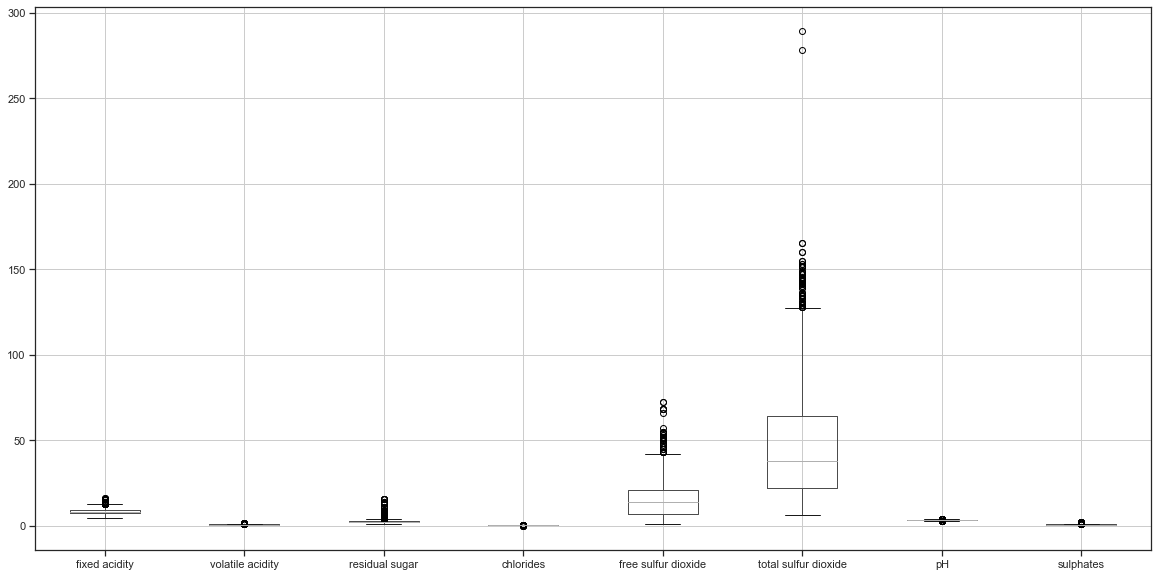

In [111]:
chem.boxplot(figsize=(20,10))

# 2. De externe dataset

We willen een externe dataset gebruiken voor het beantwoorden van een van onze onderzoeksvragen. De dataset bestaat uit engelse namen en hun geslacht. Aan de hand van de informatie uit deze dataset willen we voorspellen of de tasters in onze eigen dataset van het mannelijk of vrouwelijke geslacht zijn. 


Hieronder zien we de eerste 10 records van de externe dataset. 

In [112]:
name = pd.read_csv('names.csv', usecols=['Name', 'Gender', 'Year', 'Count'])
name.head(10)

,Name,Year,Gender,Count
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746
5,Margaret,1880,F,1578
6,Ida,1880,F,1472
7,Alice,1880,F,1414
8,Bertha,1880,F,1320
9,Sarah,1880,F,1288


# 3. Data Preparation

## 3.1. Pair Plot

Voordat we een pairplot kunnen maken moeten we de types van een aantal kolommen aanpassen. We willen bijvoorbeeld alcohol plotten en daarvoor moeten we eerst zorgen dat alcohol van het type object naar een nummeriek type geconverteerd wordt. We kunnen terwijl we dit doen ook meteen de waardes van density en citric acid omzetten naar nummerieke datatypes, mogelijk hebben we deze later nog nodig. 

In [113]:
colErrorPairs = {
    'density'    : [' . '],
    'citric acid': [' - ',' -   '],
    'alcohol'    : ['100.333.333.333.333','11.066.666.666.666.600','956.666.666.666.667','923.333.333.333.333']}

for colName in colErrorPairs:
    for faultyString in colErrorPairs[colName]:
        wine[colName] = wine[colName].replace(faultyString,np.nan)

In [114]:
wine['alcohol'] = wine['alcohol'].astype(float)

In [115]:
wine['density'] = wine['density'].astype(float)

In [116]:
wine['citric acid'] = wine['citric acid'].astype(float)

In [117]:
wine.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

 Nu dat we de gewenste types hebben omgezet kunnen we ze plotten in een pairplot

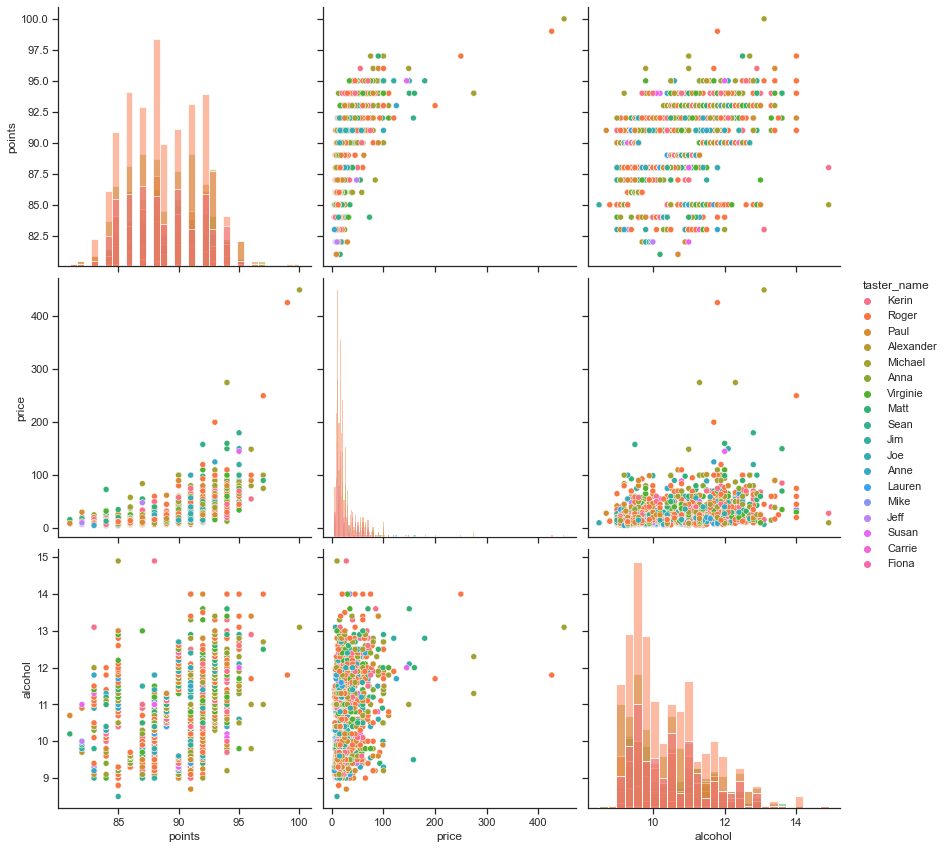

In [118]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(wine, diag_kind = "hist",
                 height = 4,
                 hue = "taster_name",

                 x_vars=["points", "price", "alcohol"], 
                 y_vars= ["points", "price", "alcohol"])

plt.show()

Hierboven zien we een pairplot waarbij we de variabelen prijs, points en alcohol met elkaar vergelijken. Elke proever heeft een apart kleurtje gekregen. 

## 3.2 Standaardiseren


Stanaardiseren helpt om eerlijker te meten. Je verwijdert de eenheden en zorgt dat alle variabelen ongeveer hetzeflde bereik hebben. 

Alle variabelen die te maken hebben met de chemische samenstelling zouden ongeveer hetzelfde bereik moeten hebben. Als we ervoor zorgen dat deze waardes bijvoorbeeld allemaal tussen de 0 en 1 liggen, kunnen we ze makkelijk met elkaar vergelijken zonder dat er één veel zwaarder weegt dan de ander.


In [119]:
wineZscore = wine.copy()
for col in chemColNames:
        wineZscore[col] = (wine[col] - wine[col].mean())/wine[col].std(ddof=0)
wineZscore.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.949660,-1.331760,0.542728,0.240020,0.223558,-0.559372,-0.639480,0.827622,1.096839,1.447261,-0.678516
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Casa Santa Vitória,-0.030452,-1.499514,0.380840,-0.826272,-0.244190,-0.752104,-0.729893,-0.126222,-0.332697,0.229843,-0.773610
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,Adega Cooperativa de Borba,-0.779950,0.904967,-1.238041,-0.044324,0.074729,-0.077542,-0.790169,-0.126400,0.447050,-0.349880,0.842984
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,Quinta de Foz de Arouce,-0.779950,0.904967,-1.238041,-0.044324,0.074729,-0.077542,-0.790169,-0.126400,0.447050,-0.349880,0.842984
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,Herdade Grande,-0.203413,-0.269315,0.218952,-0.257583,-0.307974,0.018824,-0.669618,-0.126624,-0.202740,-0.002046,1.889015


<AxesSubplot:>

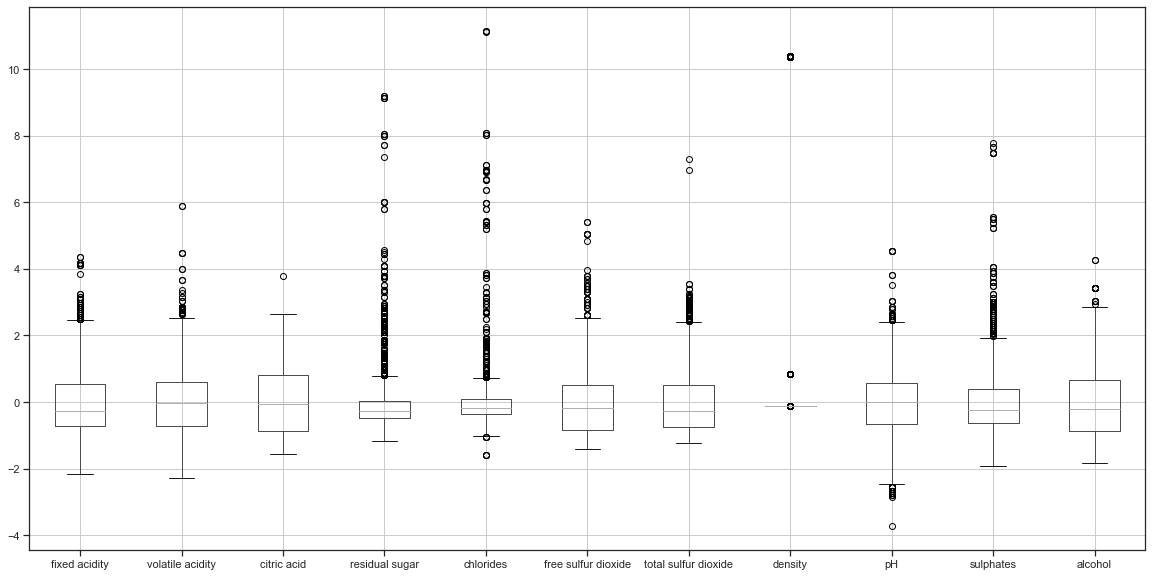

In [120]:
wineZscore.boxplot(figsize=(20,10), column=chemColNames)


# Onderzoeksvraag 1: In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?


## Lineaire regressie

Voor de eerste verplichte onderzoeksvraag gaan we supervised machine learning gebruiken. We willen de score van een wijn gaan voorspellen aan de hand van de chemische samenstelling. Dit gaan we doen met behulp van lineaire regressie. 

__1. Kies een modeltype__ 

In [121]:
from sklearn.linear_model import LinearRegression

__2. Kies de hyperparameters__


__3. Organiseer de data (feature matrix, target vector)__

Omdat we op basis van de chemische samenstelling willen gaan voorspellen, worden dit onze feature variabelen. 

In [122]:
chem.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


### Standaardiseren

Omdat de waardes van de features nogal uit elkaar liggen gaan we ze eerst standaardiseren met behulp van de Z Score. Zo zorgen we ervoor dat elke waarde tussen de -1 en 1 komt te liggen, zodat alle kolommen even zwaar mee tellen. 

In [123]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

In [124]:
X = wineZscore[features]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.949660,-1.331760,0.542728,0.240020,0.223558,-0.559372,-0.639480,0.827622,1.096839,1.447261
1,-0.030452,-1.499514,0.380840,-0.826272,-0.244190,-0.752104,-0.729893,-0.126222,-0.332697,0.229843
2,-0.779950,0.904967,-1.238041,-0.044324,0.074729,-0.077542,-0.790169,-0.126400,0.447050,-0.349880
3,-0.779950,0.904967,-1.238041,-0.044324,0.074729,-0.077542,-0.790169,-0.126400,0.447050,-0.349880
4,-0.203413,-0.269315,0.218952,-0.257583,-0.307974,0.018824,-0.669618,-0.126624,-0.202740,-0.002046


De target variabele is bij deze onderzoeksvraag de points, dit is namelijk de variabele die we willen voorspellen. 

In [125]:
y = wine.points
y.head()

0    87
1    91
2    90
3    90
4    92
Name: points, dtype: int64

__4. Creeër een training- en validatie set.__

Nu gaan we een training en test set creëeren. Door het opvullen van lege waarden met de gemiddelden verhogen we linreg.score() een beetje, deze komt later aan bod. 

In [126]:
X.fillna(X.mean(),inplace=True)
y.fillna(y.mean(),inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/daviddemmers/.local/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


De wijn dataset bestaat uit 2465 records, we gebruiken ongeveer 75% van de waardes voor de trainingset en de overige 25% voor de testset. 

In [127]:
len(wine)

2465

In [128]:
len(X_train)

1848

In [129]:
len(X_test)

617

In [130]:
linreg = LinearRegression()

Het model gaat nu leren aan de hand van de data uit de trainingsset. 

In [131]:
linreg.fit(X_train, y_train)

LinearRegression()

We gaan nu de kwaliteit van het model berekenen op basis van de data uit de testset. 

In [132]:
linreg.score(X_test,y_test)

0.17942720741894747

De score van het model is 0.04, dat deze score zo dicht bij 0 ligt wil eigenlijk zeggen dat er geen lineair verband te leggen is tussen de features en de target variabelen. 

In [133]:
y_pred = linreg.predict(X_test)

De mean squared error is de gemiddelde afwijking van de voorspelde waarden. Je wilt dit getal zo laag mogelijk hebben omdat het dus een error aangeeft. 

In [134]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.7598026655957906

### Correlatie

Correlatie toont de samenhang tussen variabelen. Hiervoor gebruiken we wederom de Zscore. Bij een grote correlatie kun je aan de hand van de ene variabele heel goed de andere voorspellen, bij een kleine correlatie gaat dit (bijna) niet. 

Correlatie kan positief en negatief zijn. Positieve correlatie wil zeggen dat wanneer X toeneemt, Y ook toeneemt. Negatieve correlatie wil zeggen dat wanneer X toeneemt, Y afneemt. Omdat een correlatie tussen de -0.4 en 0.4 zo klein is, kun je eigenlijk niet echt spreken van samenhang. 

In [135]:
wineZscore.corr()

,id,points,price,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,1.000000,0.020210,-0.025849,-0.022630,-0.060455,-0.008533,0.004168,0.027883,-0.017302,-0.047292,-0.041125,-0.011499,0.028872,-0.026607
points,0.020210,1.000000,0.586486,0.090071,-0.341131,0.185946,-0.002561,-0.132438,-0.059912,-0.198235,-0.042680,-0.021553,0.205161,0.473751
price,-0.025849,0.586486,1.000000,0.031478,-0.182749,0.117633,0.009046,-0.088986,-0.035449,-0.117392,-0.037046,-0.003534,0.100095,0.351717
fixed acidity,-0.022630,0.090071,0.031478,1.000000,-0.251469,0.658574,0.122001,0.085792,-0.146259,-0.103413,0.259202,-0.683750,0.179621,-0.033511
volatile acidity,-0.060455,-0.341131,-0.182749,-0.251469,1.000000,-0.520726,-0.001796,0.057571,0.004527,0.090757,0.024151,0.235531,-0.249800,-0.202710
citric acid,-0.008533,0.185946,0.117633,0.658574,-0.520726,1.000000,0.115617,0.198535,-0.086514,-0.027528,0.081946,-0.498958,0.296286,0.164078
residual sugar,0.004168,-0.002561,0.009046,0.122001,-0.001796,0.115617,1.000000,0.032883,0.196488,0.201968,0.283973,-0.080360,0.005866,0.042495
chlorides,0.027883,-0.132438,-0.088986,0.085792,0.057571,0.198535,0.032883,1.000000,0.011536,0.059917,0.070043,-0.260800,0.373699,-0.214887
free sulfur dioxide,-0.017302,-0.059912,-0.035449,-0.146259,0.004527,-0.086514,0.196488,0.011536,1.000000,0.675317,0.095521,0.074212,0.057024,-0.083033
total sulfur dioxide,-0.047292,-0.198235,-0.117392,-0.103413,0.090757,-0.027528,0.201968,0.059917,0.675317,1.000000,0.045214,-0.070769,0.053834,-0.247554


__Correlatie tussen de variabelen__

We gaan kijken naar de samenhang tussen variabelen onderling. Zowel featurue variabelen met elkaar, als target en feature variabelen. Hieronder zien we welke combinatie van variabelen met meest correleren met elkaar.  

In [136]:
c = wineZscore.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[172:182]

citric acid           volatile acidity        0.520726
volatile acidity      citric acid             0.520726
price                 points                  0.586486
points                price                   0.586486
citric acid           fixed acidity           0.658574
fixed acidity         citric acid             0.658574
total sulfur dioxide  free sulfur dioxide     0.675317
free sulfur dioxide   total sulfur dioxide    0.675317
fixed acidity         pH                      0.683750
pH                    fixed acidity           0.683750
dtype: float64

Points en price zijn redelijk gecorreleert, dit kan interessant zijn maar helaas is price niet een feature variabelen. Voor deze onderzoeksvraag hebben we daar dus helaas niet heel veel aan. Wel zien we hier enigzins een positieve correlatie. 

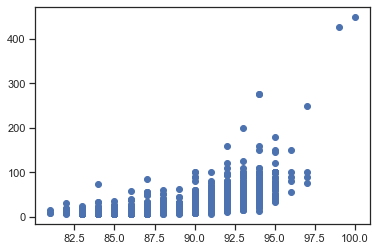

In [137]:
plt.scatter(wine.points, wine.price)

Verder zien we in de tabel hierboven nog dat fixed acidity en pH sterk gecorreleert zijn. Bij sterke correlatie tussen twee feature variabelen kun je gaan nadenken of dit wijst op redundantie, misschien heb je maar 1 van de twee variabelen nodig als ze toch bijna hetzelfde aangeven. Ook kunnen de twee variabelen juist elkaar tegen werken. 

In [138]:
fa = wine['fixed acidity']

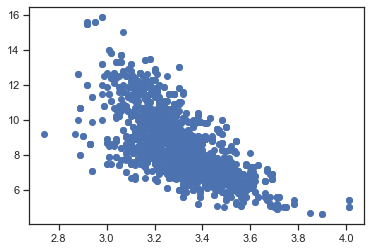

In [139]:
plt.scatter(wine.pH, fa)

#### Conclusie: tussen de feature en de target variabelen is weinig samenhang te vinden. Is het mogelijk om de score van de wijn te voorspellen aan de hand van de chemische samenstelling? Nee, eigenlijk niet. Misschien kunnen we beter de score van de wijn gaan voorspellen aan de hand van de prijs. 

# Onderzoeksvraag 3: Kun je op basis van bepaalde keywords in de beschrijving een voorspelling doen over hoe hoog de score van deze wijn is? (Supervised - Regression/ Datavisualisatie)

We willen onderzoeken of je de score van de wijn kunt bepalen aan de hand van sommige keywords die gevonden zijn in de titels en de beschrijving.

In [140]:
wine[['title','description']]

,title,description
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth..."
1,Casa Santa Vitória 2013 Grande Reserva Tinto R...,"From an estate in the south of the Alentejo, t..."
2,Adega Cooperativa de Borba 2012 Montes Claros ...,A year in wood and 30 months in bottle before ...
3,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Wood aging gives this ripe blend of Baga and T...
4,Herdade Grande 2010 Gerações Colheita Seleccio...,"A powerful wine, richly structured and full of..."
...,...,...
2460,Quinta de Lemos 2010 Dona Georgina Red (Dão),"Two classic Dão grapes, Touriga Nacional and T..."
2461,Casca Wines 2011 Monte Cascas Grande Reserva R...,Old vines in a field blend give a rich structu...
2462,Quinta da Pacheca 2013 Pacheca Superior Red (D...,This rich wine has a firm structure as well as...
2463,Seacampo 2011 Reserva Red (Dão),This mature wine that has 50% Touriga Nacional...


In [141]:
wordsPerWine = wine[['title','description']]
allWordsSeperated = np.array(' '.join(wordsPerWine.to_numpy().flatten()).replace(',','').split(" "))

In [142]:
allWordsSeperated = np.char.lower(allWordsSeperated)
(allWordsSeperated[:20],'Amount of words',allWordsSeperated.shape)

(array(['quinta', 'dos', 'avidagos', '2011', 'avidagos', 'red', '(douro)',
        'this', 'is', 'ripe', 'and', 'fruity', 'a', 'wine', 'that', 'is',
        'smooth', 'while', 'still', 'structured'], dtype='<U29'),
 'Amount of words',
 (118188,))

In [143]:
unique, counts = np.array(np.unique(allWordsSeperated, return_counts=True))
wordCount = np.array([np.array(unique), np.array(counts)])
wordFrame = pd.DataFrame(wordCount[0],wordCount[1]).reset_index()
wordFrame.columns = ['count','word']

In [144]:
stop_words = set(stopwords.words('english'))
stop_words.update(['wine','red'])

wordFrame['count'] = wordFrame['count'].astype(int)
print(wordFrame.shape)
wordFrame.drop(wordFrame[ (wordFrame['word'].isin(stop_words)) | (wordFrame['count'] < 50)].index , inplace=True)
wordFrame.sort_values(by=['count'], ascending=False)[:10]

(4524, 2)


,count,word
4014,1719,tannins
1361,1636,drink
1819,1303,fruits
228,1170,acidity
3414,1111,ripe
1809,972,fruit
610,951,black
29,880,(douro)
3401,858,rich
3247,794,quinta


In [145]:
wordFrame.shape

(247, 2)

<AxesSubplot:>

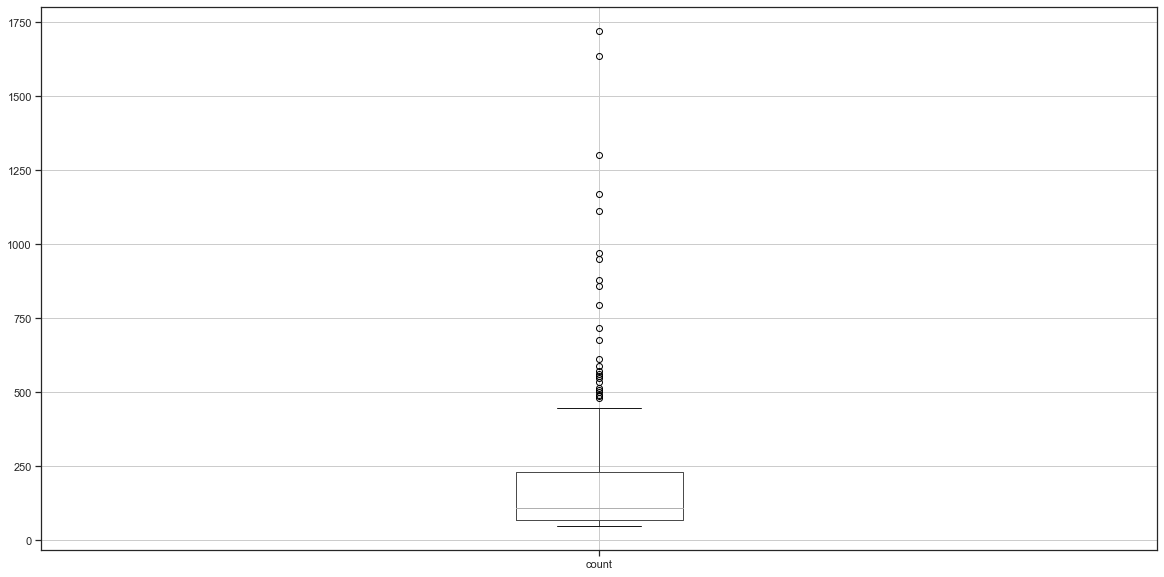

In [146]:
wordFrame.boxplot(figsize=(20,10), column='count')

# Onderzoeksvraag 2: Als we wijnen categoriseren op basis van de chemische samenstelling, zijn er bepaalde categorieën die mannelijke proevers anders beoordelen dan vrouwelijke proevers?


We willen bij deze onderzoeksvraag mannelijke en vrouwelijke proevers vergelijken door te kijken of de ene groep een bepaalde voorkeur heeft voor een bepaalde categorie wijn.

Eerst gaan we de dataset filteren op het jaar. Aangezien de namen in de names.csv file teruggaan tot aan 1880, en deze namen niet allemaal even bruikbaar zijn kijken we alleen naar het laatste jaar namen van deze dataset (2014). 

In [160]:
# name = name[name['Year'] >= 2014]
name

,Name,Year,Gender,Count
1751999,Aaban,2012,M,11
1654052,Aaban,2009,M,6
1816887,Aaban,2014,M,16
1784281,Aaban,2013,M,14
1685518,Aaban,2010,M,9
...,...,...,...,...
1654051,Zytavious,2009,M,7
1657591,Zyvion,2009,M,5
1674536,Zyyanna,2010,F,6
1823481,Zyyon,2014,M,6


In [163]:
name.sort_values(by=['Count'],ascending=False, inplace=True)
name.drop_duplicates(subset = ['Name'], keep = 'first', inplace = True)
name.sort_values(by=['Name'], inplace=True)

Nu gaan we onze twee datasets mergen. We doen een inner join op de twee kolommen waar de namen in staan en printen de eerste 5 records. 

In [164]:
merge = wine.merge(name, left_on='taster_name',right_on='Name', how='left')
merge

,id,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Name,Year,Gender,Count
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,10.0,0.29,0.40,2.9,0.098,10.0,26.0,10.00600,3.48,0.91,9.7,Kerin,1981,F,43
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,Roger,1953,M,13155
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,Paul,1957,M,26987
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,Alexander,1993,M,20523
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,Paul,1957,M,26987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2462,Portugal,"Two classic Dão grapes, Touriga Nacional and T...",Dona Georgina,93,60.0,Dão,Roger,Quinta de Lemos 2010 Dona Georgina Red (Dão),Portuguese Red,Quinta de Lemos,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,Roger,1953,M,13155
2461,2463,Portugal,Old vines in a field blend give a rich structu...,Monte Cascas Grande Reserva,93,39.0,Douro,Michael,Casca Wines 2011 Monte Cascas Grande Reserva R...,Portuguese Red,Casca Wines,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,Michael,1957,M,92709
2462,2464,Portugal,This rich wine has a firm structure as well as...,Pacheca Superior,90,NaN,Douro,Roger,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca,7.7,0.56,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,Roger,1953,M,13155
2463,2465,Portugal,This mature wine that has 50% Touriga Nacional...,Reserva,90,NaN,Dão,Roger,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo,8.1,0.53,0.22,2.2,0.078,33.0,89.0,0.99678,3.26,0.46,9.6,Roger,1953,M,13155


Nu printen we de tabel waarbij we de naam van de proever en het geslacht tonen. 

In [150]:
tasters = merge[['taster_name', 'Gender']]
tasters.head()

,taster_name,Gender
0,Alexander,M
1,Alexander,M
2,Alexander,M
3,Alexander,M
4,Alexander,M


Hieronder printen we hoe vaak een naam voorkomt met het bijbehorende geslacht. We kunnen zien dat bij een aantal namen er records zijn voor zowel Male als Female. 

In [151]:
tasters.value_counts() 

taster_name  Gender
Roger        M         85050
Michael      M         51840
Roger        F         49140
Michael      F         41472
Paul         M         29430
             F         25724
Joe          M         19305
Matt         M         18900
Joe          F         17303
Kerin        F         17286
Jim          M         14445
Anna         F         11340
             M         11088
Sean         M         10875
Kerin        M          8772
Sean         F          8500
Jim          F          8025
Anne         F          7425
             M          4565
Lauren       M          4370
Susan        F          3915
Lauren       F          3002
Virginie     F          2420
Susan        M          1914
Alexander    M          1890
Jeff         M          1215
Alexander    F          1190
Mike         M           675
Carrie       F           405
             M           312
Mike         F           290
Jeff         F           252
Fiona        F           207
Matt         F         